TP DE MACHINE LEARNING !!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

VISUALISATION DES DONNEES

In [4]:
import numpy as np
import matplotlib.pyplot as plt

d=[df["alcohol"],df["quality"]]

x=np.transpose(np.matrix(d))
y=[]
for loop in range(len(x)):
    #on considère comme bon un vin dont alcohol + qualité^2 > 11+5^2
    if(1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5):
        y.append(1)
    else:
        y.append(0)

print(x)
print(y) 

[[ 9.4  5. ]
 [ 9.8  5. ]
 [ 9.8  5. ]
 ...
 [10.5  5. ]
 [11.2  6. ]
 [10.2  5. ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [5]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,0])
            pos.append(X[loop,1])
        else:
            idneg.append(X[loop,0])
            neg.append(X[loop,1])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

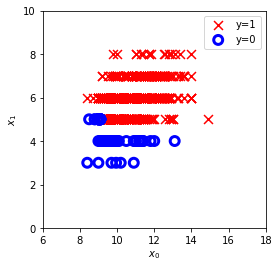

In [6]:


fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

LOGISTIC REGRESSION


In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

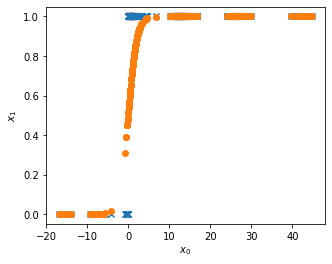

In [8]:
x_plot=[]
for loop in range(len(x)):
    x_plot.append(1.2*x[loop,0]+x[loop,1]*x[loop,1]-(11+5*5))
x_plot=np.asarray(x_plot)
xf=np.copy(x)
for loop in range(len(x)):
    xf[loop,1]=x[loop,1]*x[loop,1]

y_train = y

w_in = np.array([1.2,1])
                 
b_in = -36

z=np.dot(xf,w_in) +b_in

fig,ax = plt.subplots(1,1,figsize=(5,4))

ax.scatter(x_plot,y_train,marker="x")
ax.scatter(x_plot,sigmoid(z))
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()



BOUNDARY

[   0    1    2 ... 1197 1198 1199]


/tmp/ipykernel_70073/2525839103.py:7: RuntimeWarning: invalid value encountered in sqrt
  x1 = np.sqrt(11+5*5-x0*1.2)


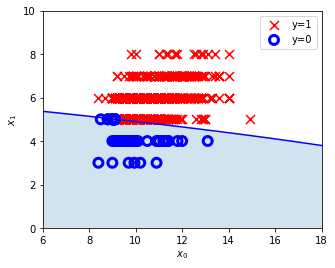

In [9]:
# Choose values between 0 and 6
x0 = np.arange(1200)
print(x0)
import math
#1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5
#ici b=-11+5*5 w0 = 1,2 w1=1
x1 = np.sqrt(11+5*5-x0*1.2)
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([6, 18, 0, 10])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(x,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

, Logistic Loss

In [10]:
import copy


def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        #cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        if(y[i]==1):
                cost +=  -np.log(f_wb_i)
        elif(y[i]==0):
                cost +=  -np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw 

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing 

TEST GRADIENT DESCENT

In [11]:
xf=np.copy(x)
xf3=np.copy(x)
for loop in range(len(x)):
    xf[loop,1]=x[loop,1]*x[loop,1]
    xf3[loop,1]=x[loop,1]*x[loop,1]*x[loop,1]

#[1.65839314 0.92518989], b:-36.080117398294995
w_tmp = np.array([1.65839314,0.92518989])
b_tmp = -36
print(compute_cost_logistic(xf, y, w_tmp, b_tmp))

0.0582841298978197


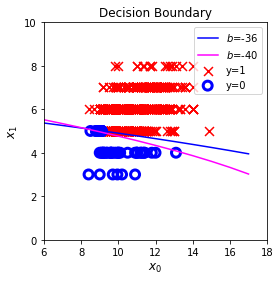

In [12]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,18)

# Plot the two decision boundaries
x1 = np.sqrt(36-x0*1.2)
x1_other = np.sqrt(36-x0*1.65839314)/0.92518989

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="blue", label="$b$=-36")
ax.plot(x0,x1_other, c="magenta", label="$b$=-40")
ax.axis([6, 18, 0, 10])

# Plot the original data
plot_data(x,y_train,ax)
ax.axis([6, 18, 0, 10])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()




In [13]:
xf=np.copy(x)
for loop in range(len(x)):
    xf[loop,1]=x[loop,1]*x[loop,1]
print(xf)
print(y)
w_tmp = np.array([1.2,1])
b_tmp = -36
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(xf, y, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

[[ 9.4 25. ]
 [ 9.8 25. ]
 [ 9.8 25. ]
 ...
 [10.5 25. ]
 [11.2 36. ]
 [10.2 25. ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

GRADIENT DESCENT APPLICATION

In [14]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                  
    X_norm = (X - mu) / sigma      
    return (X_norm, mu, sigma)


In [15]:

xf=np.copy(x)
#xf3=[] On peut vouloir créer une bordure avec un polynome de degré supérieur, mais il faudra normaliser sinon cela prendra trop de temps
for loop in range(len(x)):
    xf[loop,1]=x[loop,1]*x[loop,1]
    ##xf3.append([x[loop,0],(x[loop,1]),(x[loop,1]*x[loop,1]),(x[loop,1]*x[loop,1]*x[loop,1])])

xf=np.array(xf)
xf_norm, X_mu, X_sigma = zscore_normalize_features(xf)
print(xf)
print(y)
#w_tmp  = np.zeros_like(xf[0])
w_tmp  = np.array([0,0])
#w_tmp3  = np.array([0,0,0,0]) 
b_tmp  = -40
alph = 0.1
iters = 2000

w_out, b_out, _ = gradient_descent(xf, y, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

[[ 9.4 25. ]
 [ 9.8 25. ]
 [ 9.8 25. ]
 ...
 [10.5 25. ]
 [11.2 36. ]
 [10.2 25. ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/tmp/ipykernel_70073/4145282476.py:27: RuntimeWarning: divide by zero encountered in log
  cost +=  -np.log(1-f_wb_i)


Iteration  200: Cost 0.0684967912240313   
Iteration  400: Cost 0.06589624597823472   
Iteration  600: Cost 0.06369411933918176   
Iteration  800: Cost 0.06179281372376622   
Iteration 1000: Cost 0.060146436178124325   
Iteration 1200: Cost 0.05875771391867411   
Iteration 1400: Cost 0.05767633499580172   
Iteration 1600: Cost 0.05695168383750943   
Iteration 1800: Cost 0.05654921593547652   

updated parameters: w:[1.79414906 1.03207911], b:-40.01771322550464


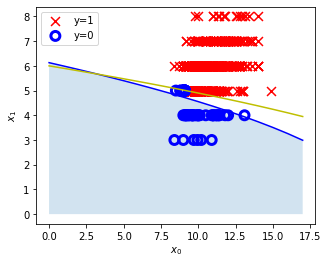

In [16]:
# Choose values between 0 and 6
#x0 = np.arange(-5,(5),0.1)
x0 = np.arange(0,18)
import math
#1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5
#ici b=-11+5*5 w0 = 1,2 w1=1
x1_init = np.sqrt(36-x0*1.2)
x1 = np.sqrt(-b_out-x0*w_out[0])

x1=x1/w_out[1]
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.plot(x0,x1_init, c="y")

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(x,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

l'algo trouve mieux que le départ !!

In [92]:
xf_over=[]
for loop in range(len(x)):
    xf_over.append([
                   x[loop,0],
                   #x[loop,1],
                   #x[loop,0]*x[loop,1],
                  # x[loop,0]*x[loop,0],
                   x[loop,1]*x[loop,1],
                   #x[loop,0]*x[loop,0]*x[loop,1],
                   #x[loop,1]*x[loop,1]*x[loop,0],
                  # x[loop,0]*x[loop,0]*x[loop,0],
                   #x[loop,1]*x[loop,1]*x[loop,1],
                   ]
                   )
                   #,x[loop,1]*x[loop,1]
                   #,x[loop,1]*x[loop,1]*x[loop,1]])

xf=np.array(xf_over)

print(xf)
print(y)
#[ 0.23659362 -0.02297259 -0.02835452  0.31405396], b:-36.00813467616476
w_tmp  = np.array([ 0,0]) 
b_tmp  = -40
alph = 0.1
iters = 2000

w_out, b_out, _ = gradient_descent(xf, y, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

[[ 9.4 25. ]
 [ 9.8 25. ]
 [ 9.8 25. ]
 ...
 [10.5 25. ]
 [11.2 36. ]
 [10.2 25. ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

/tmp/ipykernel_70073/4145282476.py:27: RuntimeWarning: divide by zero encountered in log
  cost +=  -np.log(1-f_wb_i)


Iteration  200: Cost 0.0684967912240313   
Iteration  400: Cost 0.06589624597823472   
Iteration  600: Cost 0.06369411933918176   
Iteration  800: Cost 0.06179281372376622   
Iteration 1000: Cost 0.060146436178124325   
Iteration 1200: Cost 0.05875771391867411   
Iteration 1400: Cost 0.05767633499580172   
Iteration 1600: Cost 0.05695168383750943   
Iteration 1800: Cost 0.05654921593547652   

updated parameters: w:[1.79414906 1.03207911], b:-40.01771322550464


-35.286829439958986
-34.843035422239396
-34.37859982230028
-33.893522640141654
-33.3878038757635
-32.86144352916585
-32.314441600348665
-31.746798089311973
-31.158512996055762
-30.54958632058004
-29.920018062884797
-29.269808222970042
-28.598956800835765
-27.907463796481977
-27.19532920990867
-26.462553041115846
-25.70913529010351
-24.935075956871657
-24.140375041420285
-23.325032543749398
-22.489048463858996
-21.632422801749083
-20.755155557419652
-19.857246730870706
-18.938696322102242
-17.999504331114263
-17.03967075790677
-16.059195602479758
-15.058078864833227
-14.036320544967186
-12.99392064288163
-11.930879158576555
-10.847196092051963
-9.742871443307859
-8.617905212344233
-7.472297399161093
-6.306048003758441
-5.119157026136271
-3.9116244662945903
-2.683450324233384
-1.4346345999526662
-0.16517729345243026
-0.16517729345243026
1.1249215952673168
2.4356620662065893
3.767044119365366
5.119067754743668
6.491732972341481
7.885039772158805
9.298988154195655
10.733578118452023
12.188

ValueError: x and y must have same first dimension, but have shapes (70,) and (180,)

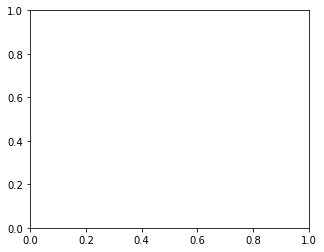

In [95]:

x1 = np.arange(0,18,0.1)
x0= np.arange(2,9,0.1)

xlab=[]
ylab=[]
i=0
j=2

while(0<=i<=18):
    i+=0.1
    j=2
    while(2<=j<=9):
        j+=0.1
        f=b_out
        f+=i*w_out[0]
        #f+=j*w_out[1]
        #f+=j*i*w_out[2]
        #f+=i*i*w_out[3]
        f+=j*j*w_out[1]
        #f+=i*i*j*w_out[5]
        #f+=i*j*j*w_out[6]
        #f+=i*i*i*w_out[7]
        #f+=j*j*j*w_out[8]
        print(f)
        if(-0.2<=f<=0.2):
            print(f)
            xlab.append(i)
            ylab.append(j)

###print(len(xlab))
#f=x1*w_out[1]
#f+=np.power(x1,2)*w_out[2]
##f+=b_out
#print(f)
#x0=-f/w_out[0]
fig,ax = plt.subplots(1,1,figsize=(5,4))

#ax.plot(x0,x1, c="y")
ax.scatter(xlab,ylab,c="orange")
ax.axis([5,20,2,10])
plot_data(x,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()